<a href="https://colab.research.google.com/github/SiEggo/scraping/blob/main/basic_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libary**

In [131]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# **Memanggil data halaman web**

In [132]:
# Menampung data
all_quotes = []

# Loop untuk 5 halaman pertama
for page in range(1, 6):
    url = f'https://quotes.toscrape.com/page/{page}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    quotes = soup.find_all('div', class_='quote')

    for q in quotes:
        text = q.find('span', class_='text').get_text(strip=True)
        author = q.find('small', class_='author').get_text(strip=True)
        tags = [tag.get_text(strip=True) for tag in q.find_all('a', class_='tag')]

        all_quotes.append({
            'Text': text,
            'Author': author,
            'Tags': ', '.join(tags)
        })

Memasukkan data ke dataframe

In [133]:
df = pd.DataFrame(all_quotes)
df.head()

,Text,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


Informasi data

In [134]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    50 non-null     object
 1   Author  50 non-null     object
 2   Tags    50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


,Text,Author,Tags
count,50,50,50
unique,50,28,45
top,“The world as we have created it is a process ...,Albert Einstein,love
freq,1,8,3


# **Cleansing Data**

Membersihkan tanda "" pada kutipan

In [135]:
df['Author'] = df['Author'].str.title()
df['Text'] = df['Text'].str.strip('“”"')
df.head()

,Text,Author,Tags
0,The world as we have created it is a process o...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,"abilities, choices"
2,There are only two ways to live your life. One...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"The person, be it gentleman or lady, who has n...",Jane Austen,"aliteracy, books, classic, humor"
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,"be-yourself, inspirational"


Membersikan data yang tidak memiliki tags

In [136]:
# Filter hanya baris yang memiliki tag (tidak kosong)
df_cleaned = df[df['Tags'].str.strip() != ''].copy()

# Optional: reset index
df_cleaned.reset_index(drop=True, inplace=True)

print(f'Jumlah data sebelum: {len(df)}')
print(f'Jumlah data sesudah: {len(df_cleaned)}')

Jumlah data sebelum: 50
Jumlah data sesudah: 48


Menambakan Kolom "WordCount" dan "TagCount"

In [137]:
df_cleaned['WordCount'] = df_cleaned['Text'].apply(lambda x: len(x.split()))
df_cleaned['TagCount'] = df_cleaned['Tags'].apply(lambda x: len(x.split(', ')))
df_cleaned

,Text,Author,Tags,WordCount,TagCount
0,The world as we have created it is a process o...,Albert Einstein,"change, deep-thoughts, thinking, world",21,4
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,"abilities, choices",16,2
2,There are only two ways to live your life. One...,Albert Einstein,"inspirational, life, live, miracle, miracles",26,5
3,"The person, be it gentleman or lady, who has n...",Jane Austen,"aliteracy, books, classic, humor",19,4
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,"be-yourself, inspirational",16,2
5,Try not to become a man of success. Rather bec...,Albert Einstein,"adulthood, success, value",14,3
6,It is better to be hated for what you are than...,André Gide,"life, love",19,2
7,"I have not failed. I've just found 10,000 ways...",Thomas A. Edison,"edison, failure, inspirational, paraphrased",12,4
8,A woman is like a tea bag; you never know how ...,Eleanor Roosevelt,misattributed-eleanor-roosevelt,19,1
9,"A day without sunshine is like, you know, night.",Steve Martin,"humor, obvious, simile",9,3


# **Analisis Visual**

Jumlah Kutipan Author

Text(0.5, 1.0, 'Jumlah Kutipan Author Terbanyak')

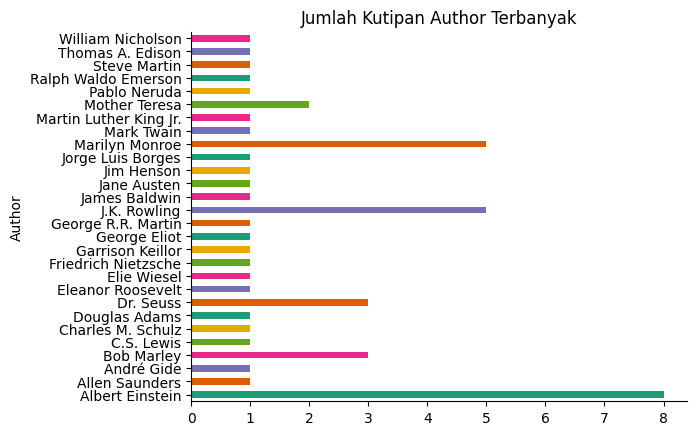

In [138]:
df_cleaned.groupby('Author').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Jumlah Kutipan Author Terbanyak')

10 tags terbanyak

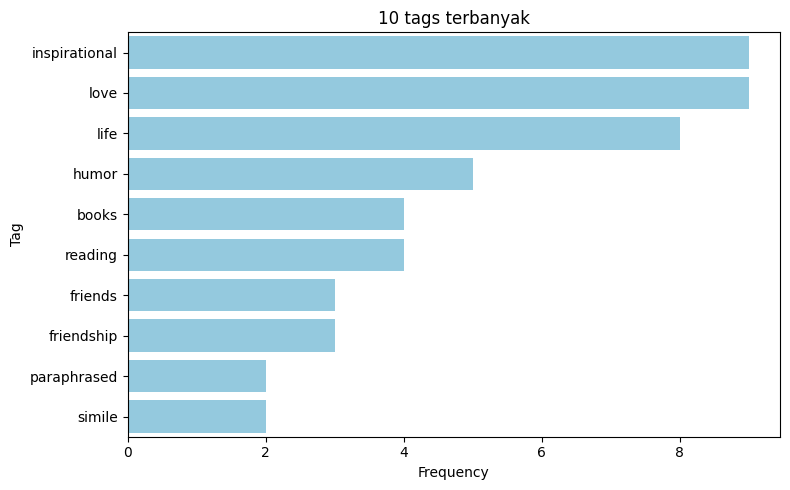

In [139]:
all_tags = ','.join(df_cleaned['Tags']).split(',')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() != ''])

common_tags = tag_counts.most_common(10)
tags_df = pd.DataFrame(common_tags, columns=['Tag', 'Count'])

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Tag', data=tags_df, color='skyblue')
plt.title('10 tags terbanyak')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()


Wordcloud tags

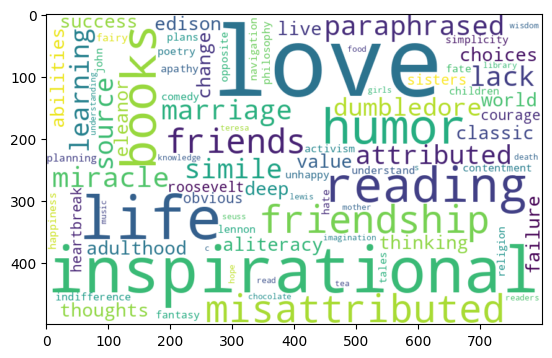

In [140]:
tags = ','.join(df['Tags']).split(',')
tag_counts = Counter([tag.strip() for tag in tags])

wc = WordCloud(width=800, height=500, background_color='white').generate(' '.join(tags))
plt.imshow(wc, interpolation='bilinear')

Histogram penyebaran kata dalam kutipan

<Axes: xlabel='WordCount', ylabel='Count'>

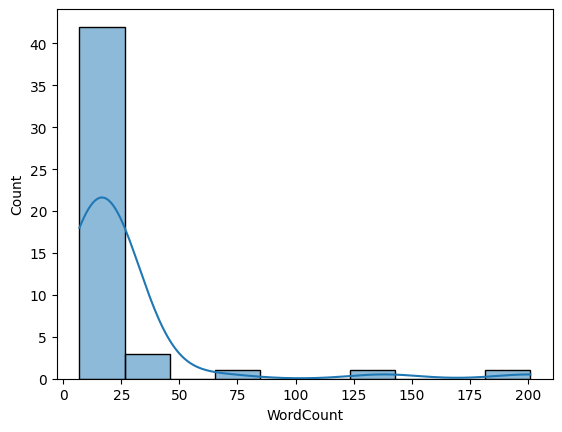

In [141]:
sns.histplot(df_cleaned['WordCount'], bins=10, kde=True)

Rata-rata kata bedasarkan tag

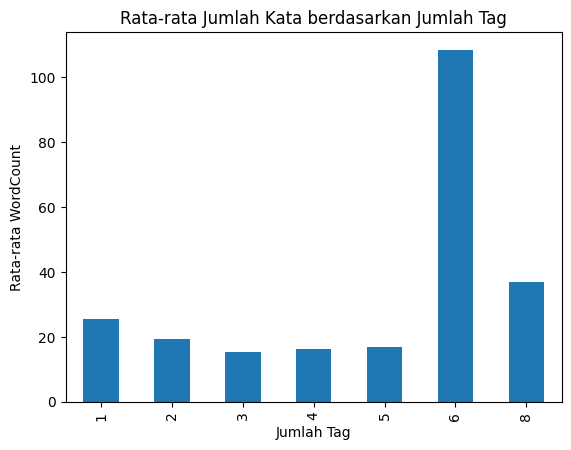

In [142]:
df_cleaned.groupby('TagCount')['WordCount'].mean().plot(kind='bar')
plt.title('Rata-rata Jumlah Kata berdasarkan Jumlah Tag')
plt.xlabel('Jumlah Tag')
plt.ylabel('Rata-rata WordCount')
plt.show()


In [143]:
correlation = df_cleaned['TagCount'].corr(df_cleaned['WordCount'])
print(f'Korelasi antara TagCount dan WordCount: {correlation:.2f}')

Korelasi antara TagCount dan WordCount: 0.21


Export data ke ecxel

In [144]:
df.to_excel("result_scraping.xlsx",index=False)